In [2]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
from scipy.stats import linregress

--------------------------------------------------------------------------------------------------------------------------

### Importando os dataframes

In [3]:
initial_users_dataframe = pd.read_csv('../resources/data/initial_users_data.csv', encoding='utf-8')
initial_users_dataframe.head()

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,dhh,2741,https://avatars.githubusercontent.com/u/2741?v=4,NaN,https://api.github.com/users/dhh,https://github.com/dhh,https://api.github.com/users/dhh/followers,https://api.github.com/users/dhh/following{/ot...,https://api.github.com/users/dhh/gists{/gist_id},https://api.github.com/users/dhh/starred{/owne...,...,NaN,NaN,3,51,18502,0,2008-03-10 17:53:51+00:00,2023-10-10 08:06:48+00:00,NaN,"jnewland, rsanheim, lifo, queso, josh, lazyato..."
1,akitaonrails,2840,https://avatars.githubusercontent.com/u/2840?v=4,NaN,https://api.github.com/users/akitaonrails,https://github.com/akitaonrails,https://api.github.com/users/akitaonrails/foll...,https://api.github.com/users/akitaonrails/foll...,https://api.github.com/users/akitaonrails/gist...,https://api.github.com/users/akitaonrails/star...,...,NaN,Codeminer 42 co-founder (offshore outsourcing)...,112,100,8853,4,2008-03-11 17:14:52+00:00,2023-10-06 16:10:22+00:00,"mojombo, elia, mattt, trustthevote","topfunky, tomtt, endersonmaia, joaovitor, vigo..."
2,georgeguimaraes,2929,https://avatars.githubusercontent.com/u/2929?v=4,NaN,https://api.github.com/users/georgeguimaraes,https://github.com/georgeguimaraes,https://api.github.com/users/georgeguimaraes/f...,https://api.github.com/users/georgeguimaraes/f...,https://api.github.com/users/georgeguimaraes/g...,https://api.github.com/users/georgeguimaraes/s...,...,NaN,"CEO at @sourcelevel, bringing Analytics for En...",10,21,303,66,2008-03-12 17:41:20+00:00,2023-08-29 19:58:39+00:00,"mislav, hugobarauna, arthurgeek, fnando, rafud...","charlenopires, cleitonfco, hugobarauna, arthur..."
3,djalmaaraujo,3402,https://avatars.githubusercontent.com/u/3402?v=4,NaN,https://api.github.com/users/djalmaaraujo,https://github.com/djalmaaraujo,https://api.github.com/users/djalmaaraujo/foll...,https://api.github.com/users/djalmaaraujo/foll...,https://api.github.com/users/djalmaaraujo/gist...,https://api.github.com/users/djalmaaraujo/star...,...,True,Senior Software Engineer at @automattic\r\n\r\...,111,52,259,121,2008-03-19 00:22:14+00:00,2023-10-04 23:09:54+00:00,"alex, waferbaby, ramon, anaisbetts, jmonteiro,...","wilkerlucio, chip, viniciusgalvao, meiraleal, ..."
4,alfakini,4171,https://avatars.githubusercontent.com/u/4171?v=4,NaN,https://api.github.com/users/alfakini,https://github.com/alfakini,https://api.github.com/users/alfakini/followers,https://api.github.com/users/alfakini/followin...,https://api.github.com/users/alfakini/gists{/g...,https://api.github.com/users/alfakini/starred{...,...,True,NaN,16,16,274,167,2008-03-31 16:40:27+00:00,2023-09-22 19:07:05+00:00,"mojombo, ryanb, carlosbrando, stuarthalloway, ...","jmonteiro, gallois, gregori, henryhamon, evanf..."


In [4]:
random_users_dataframe = pd.read_csv('../resources/data/random_users_data_50.csv', encoding='utf-8')
random_users_dataframe.head()

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,cfjedimaster,393660,https://avatars.githubusercontent.com/u/393660...,NaN,https://api.github.com/users/cfjedimaster,https://github.com/cfjedimaster,https://api.github.com/users/cfjedimaster/foll...,https://api.github.com/users/cfjedimaster/foll...,https://api.github.com/users/cfjedimaster/gist...,https://api.github.com/users/cfjedimaster/star...,...,NaN,Developer evangelist focused on the web platfo...,317,1068,1069,0,2010-09-09 18:35:26+00:00,2023-08-16 13:45:27+00:00,NaN,"criscokid, stefanfrede, souzaonofre, demian031..."
1,priscillasantana,71104894,https://avatars.githubusercontent.com/u/711048...,NaN,https://api.github.com/users/priscillasantana,https://github.com/priscillasantana,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,...,NaN,Software Engineer - React.js | Javascript | Ty...,17,0,102,54,2020-09-10 22:43:14+00:00,2023-08-10 13:06:13+00:00,"gomex, fdaciuk, dganoff, highlabs, chasenpse, ...","gomex, chasenpse, guilouro, Epitome87, EdsonLu..."
2,TinkerChic-4,147571170,https://avatars.githubusercontent.com/u/147571...,NaN,https://api.github.com/users/TinkerChic-4,https://github.com/TinkerChic-4,https://api.github.com/users/TinkerChic-4/foll...,https://api.github.com/users/TinkerChic-4/foll...,https://api.github.com/users/TinkerChic-4/gist...,https://api.github.com/users/TinkerChic-4/star...,...,NaN,NaN,1,0,0,9,2023-10-11 01:48:59+00:00,2023-10-11 01:50:51+00:00,"xiaoyifang, randombit, liamdebeasi, igorpecovn...",NaN
3,aguai,110466,https://avatars.githubusercontent.com/u/110466...,NaN,https://api.github.com/users/aguai,https://github.com/aguai,https://api.github.com/users/aguai/followers,https://api.github.com/users/aguai/following{/...,https://api.github.com/users/aguai/gists{/gist...,https://api.github.com/users/aguai/starred{/ow...,...,True,Not a coder,70,6,239,1257,2009-07-30 23:26:19+00:00,2020-02-25 18:01:40+00:00,"stevedekorte, spicycode, robbyrussell, notefla...","mattn, fourdollars, kommit, fanweixiao, esin, ..."
4,ErisvaldoCarvalho,13559517,https://avatars.githubusercontent.com/u/135595...,NaN,https://api.github.com/users/ErisvaldoCarvalho,https://github.com/ErisvaldoCarvalho,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,...,NaN,"Gosto de artes marciais, andar de patins, forr...",37,0,5,11,2015-07-29 17:46:12+00:00,2023-08-03 00:45:31+00:00,"leandrocgsi, ErikEJ, polianadias, EduardoPires...","andrejr105, victorsouza19, WSilvaM, evanderson..."


------------------------------------------------------------------------------------------------------------------------------------------------------

### Criando os grafos

#### Initial Graph

In [5]:
# Crie um grafo direcionado no NetworkX
initial_users_graph = nx.DiGraph()

# Adicione nós para os usuários
for _, row in initial_users_dataframe.iterrows():
    initial_users_graph.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            initial_users_graph.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            initial_users_graph.add_edge(follower_user, row["Nome de usuário"])

In [6]:
num_nodes_initial_graph = initial_users_graph.number_of_nodes()
num_edges_initial_graph = initial_users_graph.number_of_edges()

print(f'numero de nós {num_nodes_initial_graph}')
print(f'numero de arestas {num_edges_initial_graph}')

numero de nós 657834
numero de arestas 1139916


In [7]:
# Crie um grafo direcionado no NetworkX
random_users_graph = nx.DiGraph()

# Adicione nós para os usuários
for _, row in random_users_dataframe.iterrows():
    random_users_graph.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            random_users_graph.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            random_users_graph.add_edge(follower_user, row["Nome de usuário"])

In [8]:
num_nodes_random_graph = random_users_graph.number_of_nodes()
num_edges_random_graph = random_users_graph.number_of_edges()

print(f'numero de nós {num_nodes_random_graph}')
print(f'numero de arestas {num_edges_random_graph}')

numero de nós 35057
numero de arestas 38254


-----------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:

# Encontre os nós mais centrais (por exemplo, usando a centralidade de grau)
central_nodes_initial_users = sorted(nx.degree_centrality(initial_users_graph).items(), key=lambda x: x[1], reverse=True)[:1500]
central_nodes_initial_users = [node[0] for node in central_nodes_initial_users]

# Crie um subgrafo centrado nos nós mais centrais
subgraph_initial_users = initial_users_graph.subgraph(central_nodes_initial_users)

In [10]:
num_nodes_subgraph_initial_users = subgraph_initial_users.number_of_nodes()
num_edges_subgraph_initial_users= subgraph_initial_users.number_of_edges()

print(f'numero de nós {num_nodes_subgraph_initial_users}')
print(f'numero de arestas {num_edges_subgraph_initial_users}')

numero de nós 1500
numero de arestas 43615


In [11]:
# Encontre os nós mais centrais (por exemplo, usando a centralidade de grau)
central_nodes_random_users = sorted(nx.degree_centrality(random_users_graph).items(), key=lambda x: x[1], reverse=True)[:1500]
central_nodes_random_users = [node[0] for node in central_nodes_random_users]

# Crie um subgrafo centrado nos nós mais centrais
subgraph_random_users = random_users_graph.subgraph(central_nodes_random_users)

In [12]:
num_nodes_subgraph_random_users = subgraph_random_users.number_of_nodes()
num_edges_subgraph_random_users= subgraph_random_users.number_of_edges()

print(f'numero de nós {num_nodes_subgraph_random_users}')
print(f'numero de arestas {num_edges_subgraph_random_users}')

numero de nós 1500
numero de arestas 3571


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
# Generate Graph.gml to Gephi Software

#nx.write_gml(subgraph_initial_users, "../resources/gephi/subgraph_initial_users.gml")
#nx.write_gml(subgraph_random_users, "../resources/gephi/subgraph_random_users.gml")

---------------------------------------------------------------------------------------

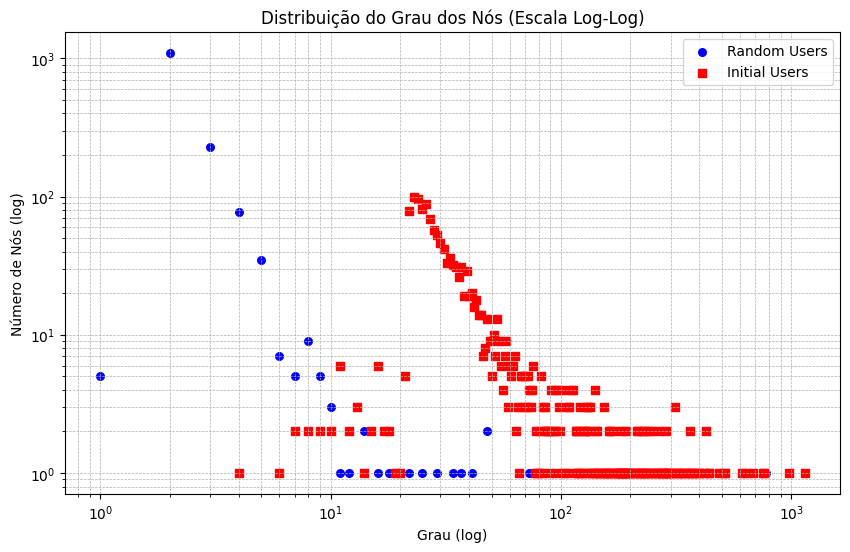

In [17]:
# Calcule os graus dos nós para os dois subgrafos
degree_sequence_random = [d for n, d in subgraph_random_users.degree()]
degree_sequence_initial = [d for n, d in subgraph_initial_users.degree()]

# Calcule as distribuições do grau para os dois subgrafos
degree_counts_random = dict(zip(*np.unique(degree_sequence_random, return_counts=True)))
degree_counts_initial = dict(zip(*np.unique(degree_sequence_initial, return_counts=True)))

# Prepare os dados para o gráfico
degrees_random, counts_random = zip(*degree_counts_random.items())
degrees_initial, counts_initial = zip(*degree_counts_initial.items())

# Plote a distribuição do grau dos nós em escala log-log para os dois subgrafos
plt.figure(figsize=(10, 6))
plt.scatter(degrees_random, counts_random, color='b', marker='o', s=30, label='Random Users')
plt.scatter(degrees_initial, counts_initial, color='r', marker='s', s=30, label='Initial Users')
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


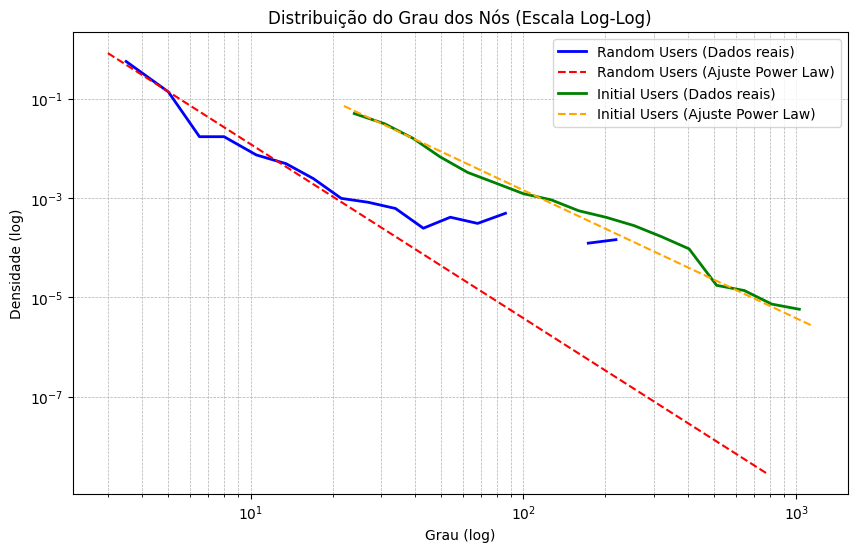

Random Users - Alpha (exponente da Power Law): 3.508246888022954
Random Users - Xmin (valor mínimo): 3.0
Initial Users - Alpha (exponente da Power Law): 2.58129397204923
Initial Users - Xmin (valor mínimo): 22.0


In [18]:

# Calcule os graus dos nós para os dois subgrafos
degree_sequence_random = [d for n, d in subgraph_random_users.degree()]
degree_sequence_initial = [d for n, d in subgraph_initial_users.degree()]

# Crie objetos PowerLaw para ambos os subgrafos
fit_random = powerlaw.Fit(degree_sequence_random)
fit_initial = powerlaw.Fit(degree_sequence_initial)

# Plote as distribuições de grau em escala log-log para ambos os subgrafos
plt.figure(figsize=(10, 6))

# Subgrafo Random Users
fit_random.plot_pdf(color='b', linewidth=2, label='Random Users (Dados reais)')
fit_random.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Random Users (Ajuste Power Law)')

# Subgrafo Initial Users
fit_initial.plot_pdf(color='g', linewidth=2, label='Initial Users (Dados reais)')
fit_initial.power_law.plot_pdf(color='orange', linestyle='--', ax=plt.gca(), label='Initial Users (Ajuste Power Law)')

# Configurações visuais
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Densidade (log)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Exiba os parâmetros estimados da Power Law para ambos os subgrafos
print("Random Users - Alpha (exponente da Power Law):", fit_random.power_law.alpha)
print("Random Users - Xmin (valor mínimo):", fit_random.power_law.xmin)

print("Initial Users - Alpha (exponente da Power Law):", fit_initial.power_law.alpha)
print("Initial Users - Xmin (valor mínimo):", fit_initial.power_law.xmin)

In [25]:
# Calcule os graus dos nós para os dois subgrafos
degree_sequence_random = [d for n, d in subgraph_random_users.degree()]
degree_sequence_initial = [d for n, d in subgraph_initial_users.degree()]

# Calcule o grau médio para ambos os subgrafos
grau_medio_random = sum(degree_sequence_random) / len(degree_sequence_random)
grau_medio_initial = sum(degree_sequence_initial) / len(degree_sequence_initial)

print("Grau Médio do Random Users:", grau_medio_random)
print("Grau Médio do Initial Users:", grau_medio_initial)


Grau Médio do Random Users: 4.761333333333333
Grau Médio do Initial Users: 58.153333333333336


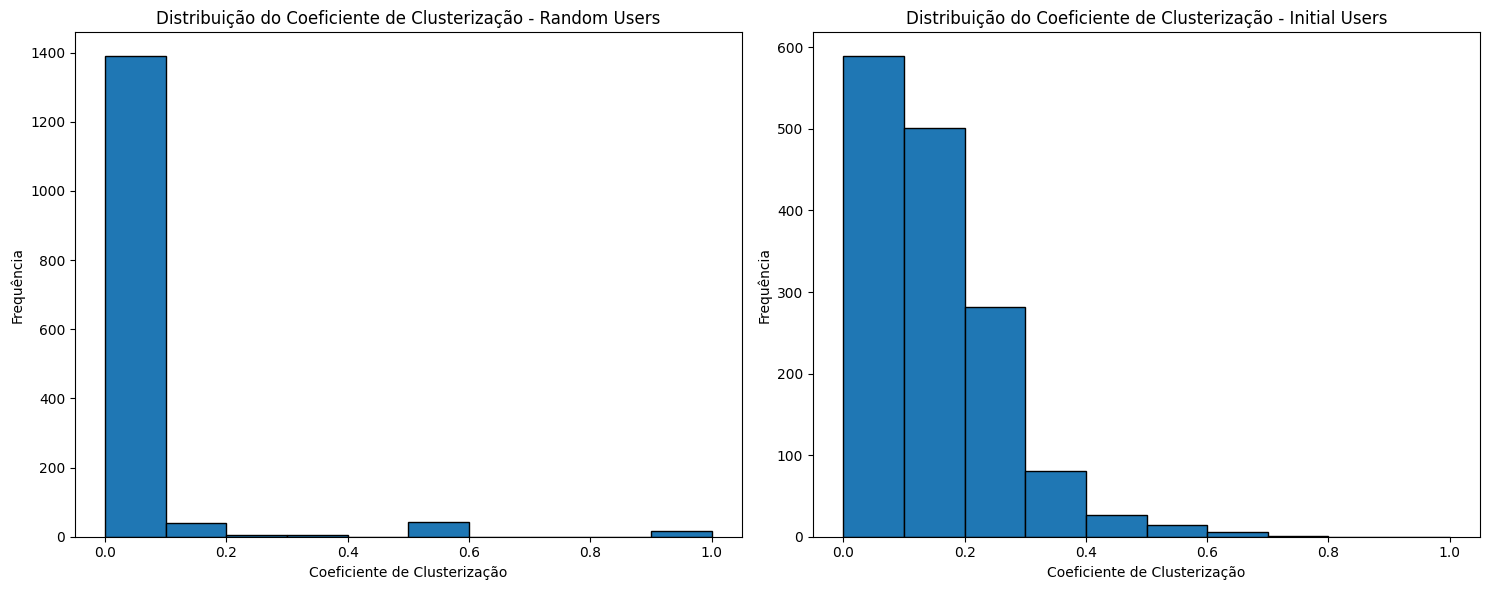

In [27]:
# Calcular o coeficiente de clusterização para cada nó nos dois subgrafos
coeficientes_nodos_random = nx.clustering(subgraph_random_users)
coeficientes_nodos_initial = nx.clustering(subgraph_initial_users)

# Configurações estilísticas
plt.figure(figsize=(15, 6))

# Subgrafo Random Users
plt.subplot(1, 2, 1)
plt.hist(list(coeficientes_nodos_random.values()), bins=np.linspace(0, 1, 11), edgecolor='black')
plt.xlabel('Coeficiente de Clusterização')
plt.ylabel('Frequência')
plt.title('Distribuição do Coeficiente de Clusterização - Random Users')

# Subgrafo Initial Users
plt.subplot(1, 2, 2)
plt.hist(list(coeficientes_nodos_initial.values()), bins=np.linspace(0, 1, 11), edgecolor='black')
plt.xlabel('Coeficiente de Clusterização')
plt.ylabel('Frequência')
plt.title('Distribuição do Coeficiente de Clusterização - Initial Users')

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [28]:
# Calcular o coeficiente de clusterização global para ambos os subgrafos
coeficiente_global_random = nx.average_clustering(subgraph_random_users)
coeficiente_global_initial = nx.average_clustering(subgraph_initial_users)

# Exibir o coeficiente de clusterização global para ambos os subgrafos
print(f'Coeficiente de Clusterização Global - Random Users: {coeficiente_global_random}')
print(f'Coeficiente de Clusterização Global - Initial Users: {coeficiente_global_initial}')


Coeficiente de Clusterização Global - Random Users: 0.03357732377439627
Coeficiente de Clusterização Global - Initial Users: 0.14848463331137346


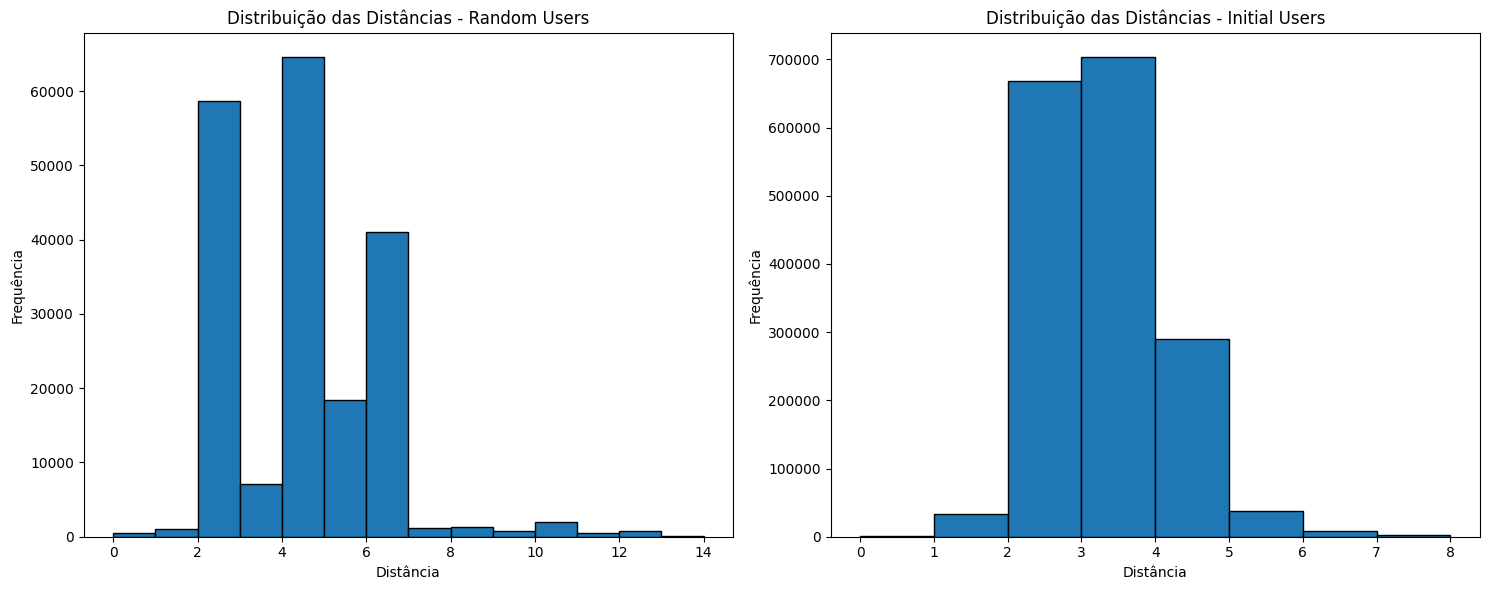

Distância Média - Random Users: 4.04533859702399
Diâmetro da Rede - Random Users: 14
Distância Média - Initial Users: 2.8103205406439216
Diâmetro da Rede - Initial Users: 8


In [29]:
# a. Calcular a distância média para a maior componente fortemente conectada nos dois subgrafos
largest_scc_random = max(nx.strongly_connected_components(subgraph_random_users), key=len)
G_largest_scc_random = subgraph_random_users.subgraph(largest_scc_random)
distancia_media_random = nx.average_shortest_path_length(G_largest_scc_random)

largest_scc_initial = max(nx.strongly_connected_components(subgraph_initial_users), key=len)
G_largest_scc_initial = subgraph_initial_users.subgraph(largest_scc_initial)
distancia_media_initial = nx.average_shortest_path_length(G_largest_scc_initial)

# b. Calcular a distribuição das distâncias de todos os nodos da rede para ambos os subgrafos
distancias_nodos_random = []
for node_random in G_largest_scc_random.nodes:
    distancias_nodos_random.extend(list(nx.shortest_path_length(G_largest_scc_random, source=node_random).values()))

distancias_nodos_initial = []
for node_initial in G_largest_scc_initial.nodes:
    distancias_nodos_initial.extend(list(nx.shortest_path_length(G_largest_scc_initial, source=node_initial).values()))

# Plotar a distribuição das distâncias para ambos os subgrafos
plt.figure(figsize=(15, 6))

# Subgrafo Random Users
plt.subplot(1, 2, 1)
plt.hist(distancias_nodos_random, bins=max(distancias_nodos_random), edgecolor='black')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.title('Distribuição das Distâncias - Random Users')

# Subgrafo Initial Users
plt.subplot(1, 2, 2)
plt.hist(distancias_nodos_initial, bins=max(distancias_nodos_initial), edgecolor='black')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.title('Distribuição das Distâncias - Initial Users')

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

# c. Calcular o diâmetro da maior componente fortemente conectada para ambos os subgrafos
diametro_rede_random = nx.diameter(G_largest_scc_random)
diametro_rede_initial = nx.diameter(G_largest_scc_initial)

# Exibir os resultados para ambos os subgrafos
print(f'Distância Média - Random Users: {distancia_media_random}')
print(f'Diâmetro da Rede - Random Users: {diametro_rede_random}')

print(f'Distância Média - Initial Users: {distancia_media_initial}')
print(f'Diâmetro da Rede - Initial Users: {diametro_rede_initial}')


In [31]:

# a. Calcular a centralidade de betweenness
betweenness_centrality = nx.betweenness_centrality(subgraph_initial_users)

# b. Calcular a centralidade de PageRank
pagerank_centrality = nx.pagerank(subgraph_initial_users)

# Exibir os resultados
print("Betweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

print("\nPageRank Centrality:")
for node, centrality in sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")


Betweenness Centrality:
jeffersonsimaogoncalves: 0.2290977595517351
sibelius: 0.11960930354981826
lucasrmagalhaes: 0.11221734853238385
csorlandi: 0.04173288976729318
ChristoPy: 0.031696443488354986

PageRank Centrality:
nan: 0.0439199828432245
torvalds: 0.01759671973935639
diego3g: 0.011290108847170263
felipefialho: 0.01069922967975489
douglascrockford: 0.010646146432579185


In [ ]:

# a. Calcular a centralidade de betweenness
betweenness_centrality = nx.betweenness_centrality(subgraph_random_users)

# b. Calcular a centralidade de PageRank
pagerank_centrality = nx.pagerank(subgraph_random_users)

# Exibir os resultados
print("Betweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

print("\nPageRank Centrality:")
for node, centrality in sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")
